In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [4]:
boston = load_boston()

X = boston.data
y = boston.target

In [5]:
reg = LinearRegression()
lasso_reg = Lasso(alpha = 5)
ridge_reg = Ridge(alpha = 5)

reg.fit(X,y)
lasso_reg.fit(X,y)
ridge_reg.fit(X,y)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [11]:
# linear_Regresiion, coefficient
print('linear_Regression')
for a, b in zip(boston.feature_names, reg.coef_):
    print("%s: %f" %(a,b))

print("intercept:",reg.intercept_,"score:",reg.score(X,y))

linear_Regression
CRIM: -0.108011
ZN: 0.046420
INDUS: 0.020559
CHAS: 2.686734
NOX: -17.766611
RM: 3.809865
AGE: 0.000692
DIS: -1.475567
RAD: 0.306049
TAX: -0.012335
PTRATIO: -0.952747
B: 0.009312
LSTAT: -0.524758
intercept: 36.459488385089855 score: 0.7406426641094094


In [12]:
print('lasso_Regression')
for a, b in zip(boston.feature_names, lasso_reg.coef_):
    print("%s: %f" %(a,b))

print("intercept:",lasso_reg.intercept_,"score:",lasso_reg.score(X,y))


lasso_Regression
CRIM: -0.000000
ZN: 0.038467
INDUS: -0.000000
CHAS: 0.000000
NOX: 0.000000
RM: 0.000000
AGE: 0.031679
DIS: -0.000000
RAD: 0.000000
TAX: -0.007669
PTRATIO: -0.000000
B: 0.006286
LSTAT: -0.747258
intercept: 30.267052853973226 score: 0.562498162686504


In [13]:
print('ridge_regression')
for a, b in zip(boston.feature_names, ridge_reg.coef_):
    print("%s: %f" %(a,b))

print("intercept:",ridge_reg.intercept_,"score:",ridge_reg.score(X,y))

ridge_regression
CRIM: -0.101799
ZN: 0.048783
INDUS: -0.035897
CHAS: 2.229483
NOX: -4.185995
RM: 3.812647
AGE: -0.010329
DIS: -1.275862
RAD: 0.278791
TAX: -0.013623
PTRATIO: -0.809818
B: 0.009988
LSTAT: -0.547877
intercept: 27.71741277690881 score: 0.7338278122211869


In [26]:
# data frame
dfX = pd.DataFrame(X, columns = boston.feature_names)
dfy = pd.DataFrame(y, columns = ["MEDV"] )
df = pd.concat([dfX,dfy],axis =1)

print(df)

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267   

In [34]:
# linear model

x_12 = np.array(dfX["LSTAT"]).reshape(-1,1) # 12th data in boston.data
y = np.array(dfy["MEDV"]).reshape(-1,1)

reg.fit(x_12,y)
lasso_reg.fit(x_12,y)
ridge_reg.fit(x_12,y)

predict_reg = reg.predict(x_12)
predict_lasso = lasso_reg.predict(x_12)
predict_ridge = ridge_reg.predict(x_12)

Text(0, 0.5, 'MEDV')

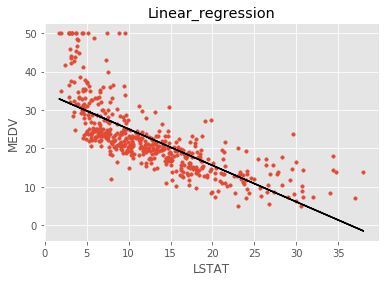

In [35]:
# linear regression plot
plt.style.use('ggplot')
plt.title('Linear_regression')
plt.scatter(x_12,y,s =12)
plt.plot(x_12,predict_reg,color='black')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

Text(0, 0.5, 'MEDV')

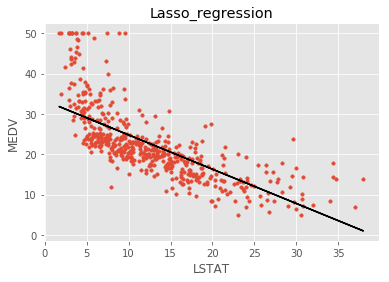

In [36]:
# Lasso regression plot
plt.title('Lasso_regression')
plt.scatter(x_12,y,s =12)
plt.plot(x_12,predict_lasso,color='black')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

Text(0, 0.5, 'MEDV')

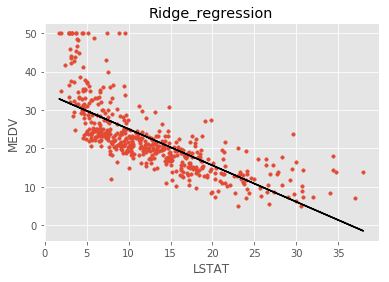

In [37]:
# Ridge regression plot
plt.title('Ridge_regression')
plt.scatter(x_12,y,s =12)
plt.plot(x_12,predict_ridge,color='black')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

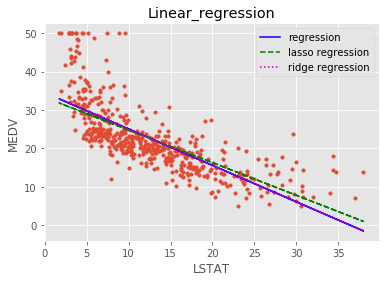

In [38]:
plt.title('Linear_regression')
plt.scatter(x_12,y,s =12)
plt.plot(x_12,predict_reg,color='b',linestyle='-',label = 'regression')
plt.plot(x_12,predict_lasso,color='g',linestyle = '--', label= 'lasso regression')
plt.plot(x_12,predict_ridge,color='m',linestyle = ':', label = 'ridge regression')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend() 

In [ ]:
# 저소득층의 비율에 따른 보스턴의 연간 소유주의 따른 주택의 가치를 회귀분석한 결과이다.
# 일반 regression의 score는 0.74, lasso regression은 0.56 ridge regression은 0.73이다.
# 이를 통해서 보면 저소득층 인구수와 MEDV의 연관성이 충분히 있다고 볼 수 있다.